In [1]:
import pandas as pd

train_df = pd.read_csv("drive/MyDrive/00AI/sign_mnist_train.csv")
valid_df = pd.read_csv("drive/MyDrive/00AI/sign_mnist_test.csv")
train_label = train_df['label']
valid_label = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate out our image vectors
train_image = train_df.values
valid_image = valid_df.values

In [2]:
train_image = train_image.reshape(-1,28,28,1) #灰階=1 RGB=3
valid_image = valid_image.reshape(-1,28,28,1)
train_image.shape, valid_image.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

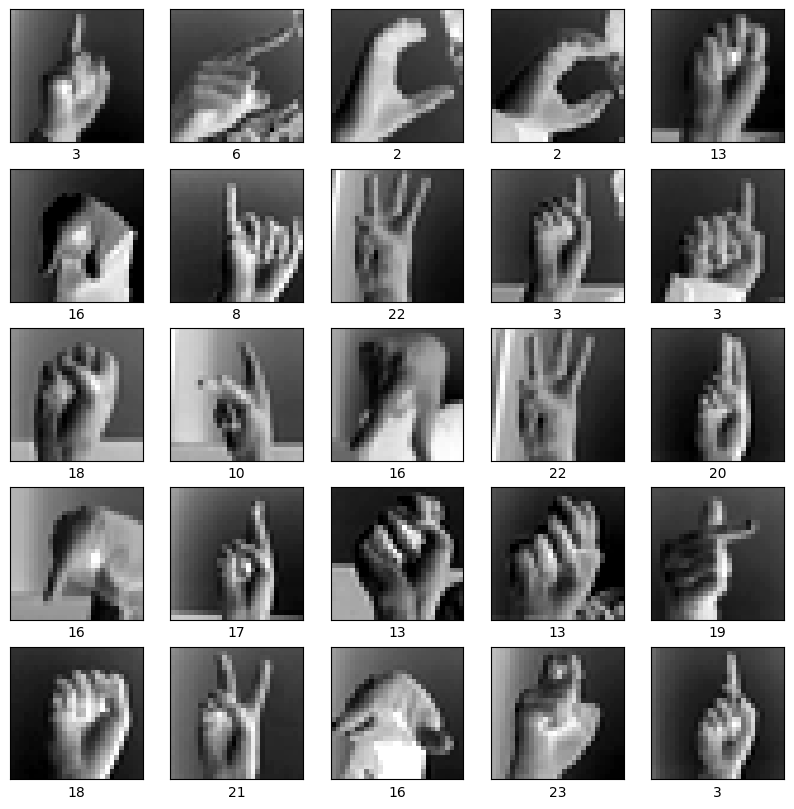

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[0+i], cmap=plt.cm.binary)
    plt.xlabel(train_label[0+i])
plt.show()

In [4]:
train_image = train_image / 255
valid_image = valid_image / 255

In [5]:
train_label.shape, train_label[0]

((27455,), 3)

In [6]:
#import tensorflow.keras as keras
import tensorflow as tf
keras=tf.keras

num_classes = 25
train_label = keras.utils.to_categorical(train_label, num_classes)
valid_label = keras.utils.to_categorical(valid_label, num_classes)

In [7]:
train_label[0:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
model=tf.keras.models.Sequential()
layers=tf.keras.layers

model.add(layers.Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",input_shape=(28, 28, 1)))#padding=same旁邊填入相同數值
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2, 2), strides=2, padding="same"))
model.add(layers.Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2, 2), strides=2, padding="same"))
model.add(layers.Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2, 2), strides=2, padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(units=num_classes, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [10]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(train_image, train_label, epochs=3, verbose=1, validation_data=(valid_image, valid_label))

Epoch 1/3
858/858 [==============================] - 18s 8ms/step - loss: 0.2961 - accuracy: 0.9085 - val_loss: 0.2104 - val_accuracy: 0.9241
Epoch 2/3
858/858 [==============================] - 5s 6ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 1.4751 - val_accuracy: 0.6776
Epoch 3/3
858/858 [==============================] - 7s 8ms/step - loss: 0.0086 - accuracy: 0.9968 - val_loss: 0.3704 - val_accuracy: 0.9113


In [11]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)

In [12]:
import numpy as np
batch_size = 32
img_iter = datagen.flow(train_image, train_label, batch_size=batch_size)

In [13]:
x, y = img_iter.next()
x.shape, y.shape

((32, 28, 28, 1), (32, 25))

In [14]:
x[0].shape

(28, 28, 1)

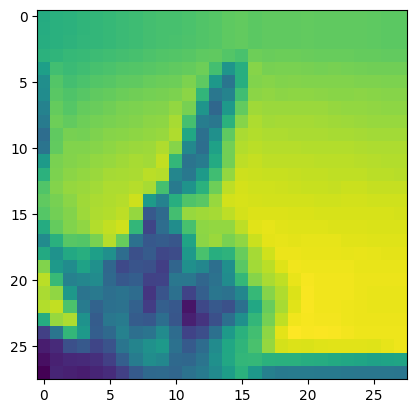

In [15]:
plt.imshow(np.squeeze(x[0]))

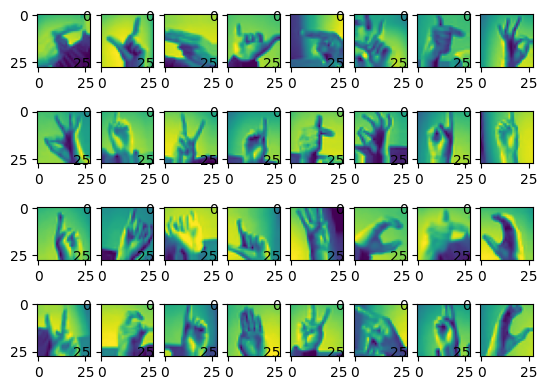

In [16]:
x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [17]:
datagen.fit(train_image)

In [18]:
train_image.shape

(27455, 28, 28, 1)

In [19]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
model.fit(img_iter,epochs=20,
          steps_per_epoch=len(train_image)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(valid_image, valid_label))

Epoch 1/20
857/857 [==============================] - 19s 17ms/step - loss: 0.7603 - accuracy: 0.7854 - val_loss: 0.1259 - val_accuracy: 0.9562
Epoch 2/20
857/857 [==============================] - 15s 17ms/step - loss: 0.2602 - accuracy: 0.9153 - val_loss: 0.1538 - val_accuracy: 0.9403
Epoch 3/20
857/857 [==============================] - 15s 17ms/step - loss: 0.1770 - accuracy: 0.9433 - val_loss: 0.3654 - val_accuracy: 0.8986
Epoch 4/20
857/857 [==============================] - 15s 17ms/step - loss: 0.1378 - accuracy: 0.9552 - val_loss: 0.6313 - val_accuracy: 0.8486
Epoch 5/20
857/857 [==============================] - 15s 17ms/step - loss: 0.1172 - accuracy: 0.9635 - val_loss: 0.0910 - val_accuracy: 0.9692
Epoch 6/20
857/857 [==============================] - 16s 19ms/step - loss: 0.0969 - accuracy: 0.9698 - val_loss: 0.0428 - val_accuracy: 0.9865
Epoch 7/20
857/857 [==============================] - 15s 17ms/step - loss: 0.0931 - accuracy: 0.9708 - val_loss: 0.1621 - val_accuracy:

In [21]:
#儲存模型
model.save('drive/MyDrive/00AI/asl_model')